In [1]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import InterclusterDistance
import seaborn as sns
from sklearn.decomposition import PCA
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
from bs4 import BeautifulSoup
import spacy
from nltk.util import ngrams
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load dataset

# dtypes = {'Userprofile_url':'category','Username':'category','Reviewdate':'category','Productname':'category','review_title':'category', 'review_text':'category', 'categoryfirst_breadcrumb':'category', 'RevDescription':'category', 'second_breadcrumb':'category', 'allbreadcrumbs':'category', 'price':'category', 'urlproduct':'category', 'name':'category', 'verified':'category'}

dtypes = {'Userprofile_url':'category','Username':'category','Reviewdate':'category','Productname':'category','review_title':'category', 'review_text':'category', 'categoryfirst_breadcrumb':'category', 'allbreadcrumbs':'category', 'price':'category', 'urlproduct':'category', 'verified_review':'category'}
ds = pd.read_excel("../2_Pre_Analysis/Output_after_pre_analysis.xlsx")

In [3]:
len(ds["Userprofile_url"].unique())

1906

In [4]:
ds.head()

,Userprofile_url,Username,Reviewdate,Productname,review_title,review_text,categoryfirst_breadcrumb,allbreadcrumbs,price,urlproduct,verified_review,Feedback
0,https://www.amazon.com/gp/profile/amzn1.accoun...,Damien Toler,01/11/2022,"Auto World Diecast, 2018 Dodge Challenger SRT ...",A excellent replica of a modern classic!,Well executed and accurately detailed...Auto W...,Toys & Games,"Kids Gift Guide, Shop Toys by Character, Shop ...",price_unavailable,https://www.amazon.com/Challenger-Worldwide-Di...,Y,no
1,https://www.amazon.com/gp/profile/amzn1.accoun...,Damien Toler,01/11/2022,Collectibles Greenlight 44940-E Hollywood Seri...,Real nice!,A beautifully done replica of a iconic car fro...,Toys & Games,"Kids Gift Guide, Shop Toys by Character, Shop ...",price_unavailable,https://www.amazon.com/Collectibles-Greenlight...,Y,no
2,https://www.amazon.com/gp/profile/amzn1.accoun...,Damien Toler,01/11/2022,Nautica Men's Classic Cotton Loose Knit Boxer,Very comfortable!,Well made and the way the underwear look...is ...,"Clothing, Shoes & Jewelry","Men, Clothing, Underwear, Boxers",$20.63,https://www.amazon.com/Nautica-Classic-Cotton-...,Y,no
3,https://www.amazon.com/gp/profile/amzn1.accoun...,Damien Toler,01/11/2022,1980 Chevy Monte Carlo Yellow Limited Edition ...,A Beautiful car!,This diecast replica is so beautiful and accur...,"Arts, Crafts & Sewing","Model & Hobby Building, Pre-Built & Diecast Mo...",price_unavailable,https://www.amazon.com/Limited-Worldwide-Johnn...,Y,no
4,https://www.amazon.com/gp/profile/amzn1.accoun...,Damien Toler,01/11/2022,Johnny Lightning - Green Hornet 1966 Chrysler ...,A beautiful replica of a pop culture iconic ve...,It would be cool if the hood could open but ot...,Toys & Games,"Vehicles, Cars & Race Cars",price_unavailable,https://www.amazon.com/Johnny-Lightning-Chrysl...,Y,no


In [5]:
# Describe dataset
summary=ds.describe(include='all')
summary=summary.transpose()
summary.head(len(summary))

,count,unique,top,freq
Userprofile_url,16741,1906,https://www.amazon.com/gp/profile/amzn1.accoun...,33
Username,16741,1677,Amazon Customer,1118
Reviewdate,16741,2283,17/02/2023,55
Productname,16741,13578,Levi's Men's 559 Relaxed Straight Jeans (Also ...,1298
review_title,16741,12800,Five Stars,267
review_text,16741,15915,Perfect,42
categoryfirst_breadcrumb,16737,64,"Clothing, Shoes & Jewelry",4775
allbreadcrumbs,16725,4722,"Men, Clothing, Jeans",1456
price,16741,3011,price_unavailable,5820
urlproduct,16741,15170,https://www.amazon.com/Levis-Mens-Relaxed-Stra...,557


In [6]:
len(ds["Productname"].unique())

13578

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16741 entries, 0 to 16740
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Userprofile_url           16741 non-null  object
 1   Username                  16741 non-null  object
 2   Reviewdate                16741 non-null  object
 3   Productname               16741 non-null  object
 4   review_title              16741 non-null  object
 5   review_text               16741 non-null  object
 6   categoryfirst_breadcrumb  16737 non-null  object
 7   allbreadcrumbs            16725 non-null  object
 8   price                     16741 non-null  object
 9   urlproduct                16741 non-null  object
 10  verified_review           16741 non-null  object
 11  Feedback                  16741 non-null  object
dtypes: object(12)
memory usage: 1.5+ MB


In [8]:
# CHECK REMOVE BECAUSE THERE IS NO EMPTHY.
# # Copy review_title to review_text where review_text is empty
# ds['review_text'].fillna(ds['review_title'], inplace=True)

In [9]:
#CHECK REMOVE DEPENDING ON PREVIOUS CELL
# ds.dropna(inplace=True)

In [10]:
#CHECK REMOVE
#ds.loc[ds["review_text"] == "unavailable", "review_text"] = ds.loc[ds["review_text"] == "review_text","review_title"]

In [11]:
# Text preprocessing
def textPreProcess(rawText, removeHTML=False, charsToRemove = r'''\?|\.|\!|\;|\.|\"|\,|\(|\)|\&|\:|\-|\%|\#|\$|\¼|\*|\+|\½|\'''', removeNumbers=True, removeLineBreaks=False, specialCharsToRemove = r'[^\x00-\xfd]', convertToLower=True, removeConsecutiveSpaces=True):
    if type(rawText) != str:
        return rawText
    procText = rawText
        
    # Remove HTML
    if removeHTML:
        procText = BeautifulSoup(procText,'html.parser').get_text()

    # Remove punctuation and other special characters
    if len(charsToRemove)>0:
        procText = re.sub(charsToRemove,' ',procText)

    # Remove numbers
    if removeNumbers:
        procText = re.sub(r'\d+',' ',procText)

    # Remove line breaks
    if removeLineBreaks:
        procText = procText.replace('\n',' ').replace('\r', '')

    # Remove special characters
    if len(specialCharsToRemove)>0:
        procText = re.sub(specialCharsToRemove,' ',procText)

    # Normalize to lower case
    if convertToLower:
        procText = procText.lower() 

    # Replace multiple consecutive spaces with just one space
    if removeConsecutiveSpaces:
        procText = re.sub(' +', ' ', procText)

    return procText

In [12]:
# Apply preprocessing to the 'reviewtext' column
ds['review_text_preprocessed'] = ds['review_text'].apply(lambda x: textPreProcess(x))



In [13]:
ds.head()

,Userprofile_url,Username,Reviewdate,Productname,review_title,review_text,categoryfirst_breadcrumb,allbreadcrumbs,price,urlproduct,verified_review,Feedback,review_text_preprocessed
0,https://www.amazon.com/gp/profile/amzn1.accoun...,Damien Toler,01/11/2022,"Auto World Diecast, 2018 Dodge Challenger SRT ...",A excellent replica of a modern classic!,Well executed and accurately detailed...Auto W...,Toys & Games,"Kids Gift Guide, Shop Toys by Character, Shop ...",price_unavailable,https://www.amazon.com/Challenger-Worldwide-Di...,Y,no,well executed and accurately detailed auto wor...
1,https://www.amazon.com/gp/profile/amzn1.accoun...,Damien Toler,01/11/2022,Collectibles Greenlight 44940-E Hollywood Seri...,Real nice!,A beautifully done replica of a iconic car fro...,Toys & Games,"Kids Gift Guide, Shop Toys by Character, Shop ...",price_unavailable,https://www.amazon.com/Collectibles-Greenlight...,Y,no,a beautifully done replica of a iconic car fro...
2,https://www.amazon.com/gp/profile/amzn1.accoun...,Damien Toler,01/11/2022,Nautica Men's Classic Cotton Loose Knit Boxer,Very comfortable!,Well made and the way the underwear look...is ...,"Clothing, Shoes & Jewelry","Men, Clothing, Underwear, Boxers",$20.63,https://www.amazon.com/Nautica-Classic-Cotton-...,Y,no,well made and the way the underwear look is ju...
3,https://www.amazon.com/gp/profile/amzn1.accoun...,Damien Toler,01/11/2022,1980 Chevy Monte Carlo Yellow Limited Edition ...,A Beautiful car!,This diecast replica is so beautiful and accur...,"Arts, Crafts & Sewing","Model & Hobby Building, Pre-Built & Diecast Mo...",price_unavailable,https://www.amazon.com/Limited-Worldwide-Johnn...,Y,no,this diecast replica is so beautiful and accur...
4,https://www.amazon.com/gp/profile/amzn1.accoun...,Damien Toler,01/11/2022,Johnny Lightning - Green Hornet 1966 Chrysler ...,A beautiful replica of a pop culture iconic ve...,It would be cool if the hood could open but ot...,Toys & Games,"Vehicles, Cars & Race Cars",price_unavailable,https://www.amazon.com/Johnny-Lightning-Chrysl...,Y,no,it would be cool if the hood could open but ot...


In [14]:
ds['review_text_preprocessed'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16741 entries, 0 to 16740
Series name: review_text_preprocessed
Non-Null Count  Dtype 
--------------  ----- 
16741 non-null  object
dtypes: object(1)
memory usage: 130.9+ KB


In [15]:
ds['review_text_preprocessed']

0        well executed and accurately detailed auto wor...
1        a beautifully done replica of a iconic car fro...
2        well made and the way the underwear look is ju...
3        this diecast replica is so beautiful and accur...
4        it would be cool if the hood could open but ot...
                               ...                        
16736    my son always wears these jeans and this pair ...
16737                           love these will order more
16738    i really like the fact that these come individ...
16739    i have worn levi s for most of my life and nev...
16740    these jeans fit great no stretch in the waist ...
Name: review_text_preprocessed, Length: 16741, dtype: object

In [16]:
##REMOVE MISSING VALUES
ds.dropna(inplace=True)

In [17]:
## Describe dataset AGAIN
summary=ds.describe(include='all')
summary=summary.transpose()
summary.head(len(summary))

,count,unique,top,freq
Userprofile_url,16721,1906,https://www.amazon.com/gp/profile/amzn1.accoun...,33
Username,16721,1677,Amazon Customer,1115
Reviewdate,16721,2281,17/02/2023,55
Productname,16721,13561,Levi's Men's 559 Relaxed Straight Jeans (Also ...,1298
review_title,16721,12789,Five Stars,266
review_text,16721,15896,Perfect,42
categoryfirst_breadcrumb,16721,62,"Clothing, Shoes & Jewelry",4775
allbreadcrumbs,16721,4721,"Men, Clothing, Jeans",1456
price,16721,3010,price_unavailable,5801
urlproduct,16721,15152,https://www.amazon.com/Levis-Mens-Relaxed-Stra...,557


In [18]:
#Review Text Tokenization and stemming
def remove_stopwords_and_stem(text):
    stop_words = set(stopwords.words('english'))
    porter_stemmer = PorterStemmer()
    words = word_tokenize(text)
    words = [porter_stemmer.stem(word) for word in words if word.lower() not in stop_words]
    return ' '.join(words)

# Apply remove_stopwords_and_stem to the 'review_text_preprocessed' column
ds['review_text_stoptokstem'] = ds['review_text_preprocessed'].apply(remove_stopwords_and_stem)

# Export to Excel
ds.to_excel("preprocessed_data_with_stopwords_stemming.xlsx", index=False)



In [19]:
# Replace missing values with empty strings
ds['review_text_stoptokstemempty'] = ds['review_text_stoptokstem'].fillna('')



In [20]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16721 entries, 0 to 16740
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Userprofile_url               16721 non-null  object
 1   Username                      16721 non-null  object
 2   Reviewdate                    16721 non-null  object
 3   Productname                   16721 non-null  object
 4   review_title                  16721 non-null  object
 5   review_text                   16721 non-null  object
 6   categoryfirst_breadcrumb      16721 non-null  object
 7   allbreadcrumbs                16721 non-null  object
 8   price                         16721 non-null  object
 9   urlproduct                    16721 non-null  object
 10  verified_review               16721 non-null  object
 11  Feedback                      16721 non-null  object
 12  review_text_preprocessed      16721 non-null  object
 13  review_text_stoptokst

In [21]:
# !python -m spacy download en_core_web_sm

In [22]:
# Function to extract nouns using spaCy

# Initialize spaCy
nlp = spacy.load('en_core_web_sm')

def extract_nouns(text):
    doc = nlp(text)
    nouns = [token.text for token in doc if token.pos_ == 'NOUN']
    return ' '.join(nouns)

# Apply noun extraction to the review_text column
ds['nouns'] = ds['review_text_stoptokstemempty'].apply(extract_nouns)

# Create document-term matrix only with review_text_stoptokstemempty column nouns
vectorizer_nouns = CountVectorizer()
dtm_nouns = vectorizer_nouns.fit_transform(ds['nouns'])

# Convert the document-term matrix noun to a DataFrame
dtmnoun_df1 = pd.DataFrame(dtm_nouns.toarray(), columns=vectorizer_nouns.get_feature_names_out())

# Concatenate necessary columns
export_df = pd.concat([ds, dtmnoun_df1], axis=1)

# Export_df.to_excel('export_nouns1spacy.xlsx', index=False) Memory difficulties
print(dtmnoun_df1)

       aa  aaa  abid  abil  abit  abl  ablaz  abound  abras  absolut  ...  \
0       0    0     0     0     0    0      0       0      0        0  ...   
1       0    0     0     0     0    0      0       0      0        0  ...   
2       0    0     0     0     0    0      0       0      0        0  ...   
3       0    0     0     0     0    0      0       0      0        0  ...   
4       0    0     0     0     0    0      0       0      0        0  ...   
...    ..  ...   ...   ...   ...  ...    ...     ...    ...      ...  ...   
16716   0    0     0     0     0    0      0       0      0        0  ...   
16717   0    0     0     0     0    0      0       0      0        0  ...   
16718   0    0     0     0     0    0      0       0      0        0  ...   
16719   0    0     0     0     0    0      0       0      0        0  ...   
16720   0    0     0     0     0    0      0       0      0        0  ...   

       zing  zip  ziplock  zipper  zits  zomei  zone  zoom  zorro  zwift  


In [23]:
# Sum Nouns frequency per review Spacy
dtmnoun_df1_sum = dtmnoun_df1.sum(axis=0).to_frame().T
dtmnoun_df1_sum

,aa,aaa,abid,abil,abit,abl,ablaz,abound,abras,absolut,...,zing,zip,ziplock,zipper,zits,zomei,zone,zoom,zorro,zwift
0,3,6,1,7,1,112,1,1,2,59,...,1,20,1,67,1,2,7,3,1,2


In [24]:
dtmnoun_df1_sum.shape

(1, 6356)

In [25]:
dtmnoun_df1.shape

(16721, 6356)

In [26]:
ds["nouns"]

0                                               world nail
1                                       icon car icon movi
2                                way underwear comfort fit
3                                          round roll year
4        hood addit vehicl collect hornet year reason p...
                               ...                        
16736                                  alway everywher els
16737                                           love order
16738            fact packag use jean store lot order year
16739                                life time loop wonder
16740                                  stretch waist happi
Name: nouns, Length: 16721, dtype: object

In [27]:
#Export Nouns frequency per review Spacy
dtmnoun_df1_sum.to_excel("export_nouns1spacyfreqperrev.xlsx", index=False)

In [28]:
#Join all Spacy nouns in 1 column and count total frequency of each noun (it can be more than one time in the same review)

# Concatenate all nouns into a single string
all_nouns_text = ' '.join(ds['nouns'].str.strip())

# print(all_nouns_text)

# Tokenize the nouns to get a list of individual nouns
all_nouns = all_nouns_text.split()

# Count the frequency of each noun
noun_freq_counter = Counter(all_nouns)

# Create a DataFrame to store the noun and frequency information
noun_freq_df = pd.DataFrame(noun_freq_counter.items(), columns=['Noun', 'Frequency'])

# Sort the DataFrame by frequency in descending order
noun_freq_df = noun_freq_df.sort_values(by='Frequency', ascending=False)

# Print the most common nouns and their frequencies
print(noun_freq_df)

# Export to Excel
noun_freq_df.to_excel('spacy_nouns.xlsx', index=False)



         Noun  Frequency
80       work       1847
86        use       1544
60    product       1527
114      time       1389
103      size       1158
...       ...        ...
4001   endors          1
4004    honor          1
4005   draggi          1
4007      gph          1
6381   lubric          1

[6382 rows x 2 columns]


In [29]:
#EXPLORE more POS spacy
sentence = "Biggest problem with streaming devices is WiFi connectivity and ability to stream youtube TV with issues such as exclusion. HULU live or Comcast/Xfinity Flex will NOT allow YouTubeTV. I have received many compliments when using this.  I use for my office briefcase as I prefer to sling over my shoulder vs. carry a traditional handle briefcase."

doc = nlp(sentence)

for token in doc:
    print(token.text, token.pos_)

Biggest ADJ
problem NOUN
with ADP
streaming NOUN
devices NOUN
is AUX
WiFi PROPN
connectivity NOUN
and CCONJ
ability NOUN
to PART
stream VERB
youtube NOUN
TV NOUN
with ADP
issues NOUN
such ADJ
as ADP
exclusion NOUN
. PUNCT
HULU NOUN
live VERB
or CCONJ
Comcast PROPN
/ SYM
Xfinity PROPN
Flex PROPN
will AUX
NOT PART
allow VERB
YouTubeTV PROPN
. PUNCT
I PRON
have AUX
received VERB
many ADJ
compliments NOUN
when SCONJ
using VERB
this PRON
. PUNCT
  SPACE
I PRON
use VERB
for ADP
my PRON
office NOUN
briefcase NOUN
as SCONJ
I PRON
prefer VERB
to PART
sling VERB
over ADP
my PRON
shoulder NOUN
vs. X
carry VERB
a DET
traditional ADJ
handle NOUN
briefcase NOUN
. PUNCT


In [30]:
# nltk.download('averaged_perceptron_tagger')

In [31]:
# Function to extract nouns using NLTK
def extract_nouns(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    nouns = [word for word, pos in pos_tags if pos.startswith('N')]
    return ' '.join(nouns)

# Apply noun extraction to the reviewtext column
ds['nouns2'] = ds['review_text_stoptokstemempty'].apply(extract_nouns)

# Create document-term matrix only with reviewtext nouns
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(ds['nouns2'])

# Convert the document-term matrix noun to a DataFrame
dtmnoun_df2 = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate necessary columns
export_df = pd.concat([ds, dtmnoun_df2], axis=1)

# Export_df.to_excel('export_nouns2nltk.xlsx', index=False) Memory difficulties
# Print the document-term matrix noun DataFrame
print(dtmnoun_df2)

       ________________  ________________receiv  _pair_  _s  aa  aaa  aang  \
0                     0                       0       0   0   0    0     0   
1                     0                       0       0   0   0    0     0   
2                     0                       0       0   0   0    0     0   
3                     0                       0       0   0   0    0     0   
4                     0                       0       0   0   0    0     0   
...                 ...                     ...     ...  ..  ..  ...   ...   
16716                 0                       0       0   0   0    0     0   
16717                 0                       0       0   0   0    0     0   
16718                 0                       0       0   0   0    0     0   
16719                 0                       0       0   0   0    0     0   
16720                 0                       0       0   0   0    0     0   

       ab  abandon  abd  ...  zoto  zrt  zte  zulkit  zune  zwi

In [32]:
# Sum Nouns frequency per review NLTK
dtmnoun_df2_sum = dtmnoun_df2.sum(axis=0).to_frame().T
dtmnoun_df2_sum

,________________,________________receiv,_pair_,_s,aa,aaa,aang,ab,abandon,abd,...,zoto,zrt,zte,zulkit,zune,zwift,zwo,zxe,zyrtec,àsguard
0,1,1,1,2,6,7,2,6,1,1,...,1,1,1,1,1,2,3,1,1,1


In [33]:
sum(dtmnoun_df2[0:].iloc[6])

3

In [34]:
#Export Nouns frequency per review NLTK
dtmnoun_df2_sum.to_excel('export_nouns2nltkfreqperrev.xlsx', index=False)

In [35]:
#Join all NLTK nouns in 1 column and count total frequency of each noun (it can be more than one time in the same review)

# Concatenate all nouns into a single string
all_nouns_text = ' '.join(ds['nouns2'])

# Tokenize the nouns to get a list of individual nouns
all_nouns = all_nouns_text.split()

# Count the frequency of each noun
noun_freq_counter = Counter(all_nouns)

# Create a DataFrame to store the noun and frequency information
noun_freq_df = pd.DataFrame(noun_freq_counter.items(), columns=['Noun', 'Frequency'])

# Sort the DataFrame by frequency in descending order
noun_freq_df = noun_freq_df.sort_values(by='Frequency', ascending=False)

# Print the most common nouns and their frequencies
print(noun_freq_df)

# Export to Excel
noun_freq_df.to_excel('NLTK_nouns.xlsx', index=False)

         Noun  Frequency
123      work       2608
106       use       2385
95    product       1553
185      time       1417
12        fit       1402
...       ...        ...
5641  mccurri          1
5640     govt          1
5639  canvass          1
5638  anybodi          1
9196   lubric          1

[9197 rows x 2 columns]


In [36]:
# EXPLORE more POS NLTK
sentence2 = "Biggest problem with streaming devices is WiFi connectivity and ability to stream youtube TV with issues such as exclusion. HULU live or Comcast/Xfinity Flex will NOT allow YouTubeTV"

# Tokenize the sentence into words
words = word_tokenize(sentence2)

# Perform part-of-speech tagging using NLTK
tagged_words = nltk.pos_tag(words)

# Print the POS tagging for the entire sentence
print(tagged_words)

[('Biggest', 'NNP'), ('problem', 'NN'), ('with', 'IN'), ('streaming', 'VBG'), ('devices', 'NNS'), ('is', 'VBZ'), ('WiFi', 'NNP'), ('connectivity', 'NN'), ('and', 'CC'), ('ability', 'NN'), ('to', 'TO'), ('stream', 'VB'), ('youtube', 'JJ'), ('TV', 'NN'), ('with', 'IN'), ('issues', 'NNS'), ('such', 'JJ'), ('as', 'IN'), ('exclusion', 'NN'), ('.', '.'), ('HULU', 'NNP'), ('live', 'VBP'), ('or', 'CC'), ('Comcast/Xfinity', 'NNP'), ('Flex', 'NNP'), ('will', 'MD'), ('NOT', 'NNP'), ('allow', 'VB'), ('YouTubeTV', 'NNP')]


In [37]:
# Function to find 3-gram expressions starting with "I am" in 'review_text_preprocessed' column

def find_3gram_starting_with_iam(tokens):
    n = 3  
    tokens = tokens.split()
    grams = list(ngrams(tokens, n))
    result = [gram for gram in grams if gram[0] == 'i' and gram[1] == 'am']
    return result
   
# Apply the function to each row in the 'review_text_preprocessed' column
ds['I_am_3grams'] = ds['review_text_preprocessed'].apply(find_3gram_starting_with_iam)

# list 3-gram expressions starting with "I am" found in ds['I_am_3grams']
iam_3grams_list = ds['I_am_3grams'].tolist()
print(iam_3grams_list)


[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [('i', 'am', 'sleeping')], [], [], [], [], [], [], [], [], [], [], [], [], [], [('i', 'am', 'definitely')], [], [], [], [], [], [], [], [], [('i', 'am', 'so')], [], [], [('i', 'am', 'going')], [], [], [], [], [], [], [('i', 'am', 'listening')], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [('i', 'am', 'very')], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [('i', 'am', 'not')], [], [], [], [], [], [], [], [], [], [], [], [], [('i', 'am', 'dissapointed')], [], [], [], [], [], [], [('i', 'am', 'playing')], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], 

In [38]:
# Define a function to perform NER with spaCy
def performNER(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply the NER function to the review text in the dataframe
ds['reviewtext_entities'] = ds['review_text'].apply(lambda x: performNER(textPreProcess(x)))

In [39]:
ds['reviewtext_entities'].info()

<class 'pandas.core.series.Series'>
Index: 16721 entries, 0 to 16740
Series name: reviewtext_entities
Non-Null Count  Dtype 
--------------  ----- 
16721 non-null  object
dtypes: object(1)
memory usage: 777.3+ KB


In [40]:
#Dictionary for lifestyles based in common/relevant nouns and 3-gram

lifestyle_dictionary = {
    'Activities Work': ['office', 'school', 'student', 'worker', 'musician', 'classroom'],
    'Activities Hobbies': ['hobbi', 'hobbyist', 'hobb'],
    'Activities Social Events': ['christma', 'halloween'],
    'Activities Vacation': ['travel', 'trip', 'camper', 'flight', 'hotel', 'vacat', 'passport', 'airport'],
    'Activities Entertainment': ['book', 'game', 'music', 'dvd', 'rock', 'film', 'gamer', 'gameplay', 'pocketbook', 'audiobook', 'movies'],
    'Activities Club Membership': ['doctor', 'teacher', 'restaur', 'church'],
    'Activities Community': ['friend', 'neighbor', 'uniform', 'neighborhood'],
    'Activities Sports': ['walk', 'bike', 'gym', 'golf', 'sport', 'basket', 'runner', 'athlet', 'yoga', 'bicycl', 'skate'],
    'Interests Family': ['son', 'daughter', 'wife', 'husband', 'kid', 'grandson', 'mom', 'granddaught', 'mother', 'child', 'children', 'brother', 'dad', 'nephew', 'sister', 'toddler', 'girlfriend', 'parent', 'boyfriend', 'father', 'grandchildren', 'grandkid', 'grandma', 'grandpa', 'grandmoth'],
    'Interests Home': ['bed', 'chair', 'kitchen', 'bathroom', 'yard', 'pool', 'grill', 'bedroom', 'decor', 'patio', 'porch', 'backyard'],
    'Interests Job': ['career', 'boss', 'manager', 'office', 'colleague'],
    'Interests Community': ['ipad', 'wrangler', 'alexa', 'macbook', 'garmin', 'dyson', 'phillip', 'disney', 'nike', 'starbuck', 'airbook'],
    'Interests Recreation': ['art', 'guitar', 'drone'],
    'Interests Fashion': ['shirt', 'shoe', 'boot', 'hat', 'sock', 'dress', 'jacket', 'glove', 'belt', 'cap', 'wallet', 'coat', 'sandal'],
    'Interests Food': ['tea', 'coffe', 'protein', 'wine', 'chees', 'fruit', 'beer', 'veget', 'pizza'],
    'Interests Media': ['tv', 'radio', 'youtub', 'facebook', 'tiktok', 'twitter'],
    'Interests Pets': ['dog', 'cat', 'bird', 'pet', 'kitten', 'aquarium', 'catbox']
}


In [41]:
ds["review_text_stoptokstemempty"]

0                 well execut accur detail auto world nail
1                   beauti done replica icon car icon movi
2            well made way underwear look good comfort fit
3        diecast replica beauti accur johnni lightn / r...
4        would cool hood could open incred addit vehicl...
                               ...                        
16736    son alway wear jean pair snug backsid fit ever...
16737                                           love order
16738    realli like fact come individu packag use buy ...
16739    worn levi life never issu jean worn like time ...
16740    jean fit great stretch waist like id hope othe...
Name: review_text_stoptokstemempty, Length: 16721, dtype: object

In [42]:
for category, keywords in lifestyle_dictionary.items():
    ds[category] = ds['review_text_stoptokstemempty'].apply(lambda x: 1 if any(keyword in x for keyword in keywords) else 0)

In [43]:
ds2 = ds.drop(["nouns", "nouns2", "I_am_3grams"], axis=1)

In [44]:
ds2

,Userprofile_url,Username,Reviewdate,Productname,review_title,review_text,categoryfirst_breadcrumb,allbreadcrumbs,price,urlproduct,...,Activities Sports,Interests Family,Interests Home,Interests Job,Interests Community,Interests Recreation,Interests Fashion,Interests Food,Interests Media,Interests Pets
0,https://www.amazon.com/gp/profile/amzn1.accoun...,Damien Toler,01/11/2022,"Auto World Diecast, 2018 Dodge Challenger SRT ...",A excellent replica of a modern classic!,Well executed and accurately detailed...Auto W...,Toys & Games,"Kids Gift Guide, Shop Toys by Character, Shop ...",price_unavailable,https://www.amazon.com/Challenger-Worldwide-Di...,...,0,0,0,0,0,0,0,0,0,0
1,https://www.amazon.com/gp/profile/amzn1.accoun...,Damien Toler,01/11/2022,Collectibles Greenlight 44940-E Hollywood Seri...,Real nice!,A beautifully done replica of a iconic car fro...,Toys & Games,"Kids Gift Guide, Shop Toys by Character, Shop ...",price_unavailable,https://www.amazon.com/Collectibles-Greenlight...,...,0,0,0,0,0,0,0,0,0,0
2,https://www.amazon.com/gp/profile/amzn1.accoun...,Damien Toler,01/11/2022,Nautica Men's Classic Cotton Loose Knit Boxer,Very comfortable!,Well made and the way the underwear look...is ...,"Clothing, Shoes & Jewelry","Men, Clothing, Underwear, Boxers",$20.63,https://www.amazon.com/Nautica-Classic-Cotton-...,...,0,0,0,0,0,0,0,0,0,0
3,https://www.amazon.com/gp/profile/amzn1.accoun...,Damien Toler,01/11/2022,1980 Chevy Monte Carlo Yellow Limited Edition ...,A Beautiful car!,This diecast replica is so beautiful and accur...,"Arts, Crafts & Sewing","Model & Hobby Building, Pre-Built & Diecast Mo...",price_unavailable,https://www.amazon.com/Limited-Worldwide-Johnn...,...,0,0,0,0,0,0,0,0,0,0
4,https://www.amazon.com/gp/profile/amzn1.accoun...,Damien Toler,01/11/2022,Johnny Lightning - Green Hornet 1966 Chrysler ...,A beautiful replica of a pop culture iconic ve...,It would be cool if the hood could open but ot...,Toys & Games,"Vehicles, Cars & Race Cars",price_unavailable,https://www.amazon.com/Johnny-Lightning-Chrysl...,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16736,https://www.amazon.com/gp/profile/amzn1.accoun...,Lori M,01/11/2020,Levi's Men's 559 Relaxed Straight Jeans,?,My son always wears these jeans (559) and this...,"Clothing, Shoes & Jewelry","Clothing, Shoes & Jewelry, Men, Clothing, Jeans",$34.1871,https://www.amazon.com/Levis-Mens-Relaxed-Stra...,...,0,1,0,0,0,0,0,0,0,0
16737,https://www.amazon.com/gp/profile/amzn1.accoun...,Shannon,21/01/2021,Levi's Men's 559 Relaxed Straight Jeans,Great jeans,Love these will order more,"Clothing, Shoes & Jewelry","Clothing, Shoes & Jewelry, Men, Clothing, Jeans",$34.1657,https://www.amazon.com/Levis-Mens-Relaxed-Stra...,...,0,0,0,0,0,0,0,0,0,0
16738,https://www.amazon.com/gp/profile/amzn1.accoun...,P.S.,11/01/2022,Levi's Men's 559 Relaxed Straight Jeans,Great fit. More important they are a better va...,I really like the fact that these come individ...,"Clothing, Shoes & Jewelry","Clothing, Shoes & Jewelry, Men, Clothing, Jeans",$34.872,https://www.amazon.com/Levis-Mens-Relaxed-Stra...,...,0,0,0,0,0,1,0,0,0,0
16739,https://www.amazon.com/gp/profile/amzn1.accoun...,Hollis Lewis,09/09/2021,Levi's Men's 559 Relaxed Straight Jeans,Very poor quality.,I have worn Levi’s for most of my life and nev...,"Clothing, Shoes & Jewelry","Clothing, Shoes & Jewelry, Men, Clothing, Jeans",$34.1099,https://www.amazon.com/Levis-Mens-Relaxed-Stra...,...,0,0,0,0,0,0,1,0,0,0


In [45]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16721 entries, 0 to 16740
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Userprofile_url               16721 non-null  object
 1   Username                      16721 non-null  object
 2   Reviewdate                    16721 non-null  object
 3   Productname                   16721 non-null  object
 4   review_title                  16721 non-null  object
 5   review_text                   16721 non-null  object
 6   categoryfirst_breadcrumb      16721 non-null  object
 7   allbreadcrumbs                16721 non-null  object
 8   price                         16721 non-null  object
 9   urlproduct                    16721 non-null  object
 10  verified_review               16721 non-null  object
 11  Feedback                      16721 non-null  object
 12  review_text_preprocessed      16721 non-null  object
 13  review_text_stoptokst

In [46]:
ds3 = ds2.drop(["Feedback", "reviewtext_entities"], axis=1)

In [47]:
ds3.to_excel("export_dataset_category_presence.xlsx", index=False)

In [48]:
ds3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16721 entries, 0 to 16740
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Userprofile_url               16721 non-null  object
 1   Username                      16721 non-null  object
 2   Reviewdate                    16721 non-null  object
 3   Productname                   16721 non-null  object
 4   review_title                  16721 non-null  object
 5   review_text                   16721 non-null  object
 6   categoryfirst_breadcrumb      16721 non-null  object
 7   allbreadcrumbs                16721 non-null  object
 8   price                         16721 non-null  object
 9   urlproduct                    16721 non-null  object
 10  verified_review               16721 non-null  object
 11  review_text_preprocessed      16721 non-null  object
 12  review_text_stoptokstem       16721 non-null  object
 13  review_text_stoptokst

In [49]:
def count_categories(row, dictionary):
    count = sum(1 for category, terms in dictionary.items() if any(term in row['review_text'] for term in terms))
    return count

ds3['category_count'] = ds3.iloc[:,14:].sum(axis=1)

In [50]:
# Users with at least one dictionary category present
at_least_one = ds3[ds3['category_count'] >= 1]['Userprofile_url'].nunique()

# Users with two or more dictionary categories present
two_or_more = ds3[ds3['category_count'] >= 2]['Userprofile_url'].nunique()

print(f"Number of user profiles with at least one dictionary category present: {at_least_one}")
print(f"Number of user profiles with two or more dictionary categories present: {two_or_more}")


Number of user profiles with at least one dictionary category present: 1430
Number of user profiles with two or more dictionary categories present: 762


In [51]:
ds4 = ds3[ds3['category_count'] >= 1]

In [52]:
ds4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5542 entries, 4 to 16739
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Userprofile_url               5542 non-null   object
 1   Username                      5542 non-null   object
 2   Reviewdate                    5542 non-null   object
 3   Productname                   5542 non-null   object
 4   review_title                  5542 non-null   object
 5   review_text                   5542 non-null   object
 6   categoryfirst_breadcrumb      5542 non-null   object
 7   allbreadcrumbs                5542 non-null   object
 8   price                         5542 non-null   object
 9   urlproduct                    5542 non-null   object
 10  verified_review               5542 non-null   object
 11  review_text_preprocessed      5542 non-null   object
 12  review_text_stoptokstem       5542 non-null   object
 13  review_text_stoptokste

In [53]:
lifestyle_dictionary.items()

dict_items([('Activities Work', ['office', 'school', 'student', 'worker', 'musician', 'classroom']), ('Activities Hobbies', ['hobbi', 'hobbyist', 'hobb']), ('Activities Social Events', ['christma', 'halloween']), ('Activities Vacation', ['travel', 'trip', 'camper', 'flight', 'hotel', 'vacat', 'passport', 'airport']), ('Activities Entertainment', ['book', 'game', 'music', 'dvd', 'rock', 'film', 'gamer', 'gameplay', 'pocketbook', 'audiobook', 'movies']), ('Activities Club Membership', ['doctor', 'teacher', 'restaur', 'church']), ('Activities Community', ['friend', 'neighbor', 'uniform', 'neighborhood']), ('Activities Sports', ['walk', 'bike', 'gym', 'golf', 'sport', 'basket', 'runner', 'athlet', 'yoga', 'bicycl', 'skate']), ('Interests Family', ['son', 'daughter', 'wife', 'husband', 'kid', 'grandson', 'mom', 'granddaught', 'mother', 'child', 'children', 'brother', 'dad', 'nephew', 'sister', 'toddler', 'girlfriend', 'parent', 'boyfriend', 'father', 'grandchildren', 'grandkid', 'grandma', 

In [54]:
# ds3.sum(axis=0, numeric_only=True)
ds5 = ds4.iloc[:, [0] + list(range(14, ds4.shape[1]))]
ds5 = ds5.groupby('Userprofile_url').max().reset_index()
ds5

,Userprofile_url,Activities Work,Activities Hobbies,Activities Social Events,Activities Vacation,Activities Entertainment,Activities Club Membership,Activities Community,Activities Sports,Interests Family,Interests Home,Interests Job,Interests Community,Interests Recreation,Interests Fashion,Interests Food,Interests Media,Interests Pets,category_count
0,https://www.amazon.com/gp/profile/amzn1.accoun...,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,1,3
1,https://www.amazon.com/gp/profile/amzn1.accoun...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,https://www.amazon.com/gp/profile/amzn1.accoun...,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,1,2
3,https://www.amazon.com/gp/profile/amzn1.accoun...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
4,https://www.amazon.com/gp/profile/amzn1.accoun...,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,https://www.amazon.com/gp/profile/amzn1.accoun...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1426,https://www.amazon.com/gp/profile/amzn1.accoun...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1427,https://www.amazon.com/gp/profile/amzn1.accoun...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
1428,https://www.amazon.com/gp/profile/amzn1.accoun...,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,2


In [55]:
ds5.to_excel("export_userprofile_category_presence.xlsx", index=False)

In [56]:
X = ds5.iloc[:,1:-1]

In [57]:
X = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(X.values), columns=X.columns,index=X.index)

(1430, 2)


Text(0, 0.5, 'Component 2')

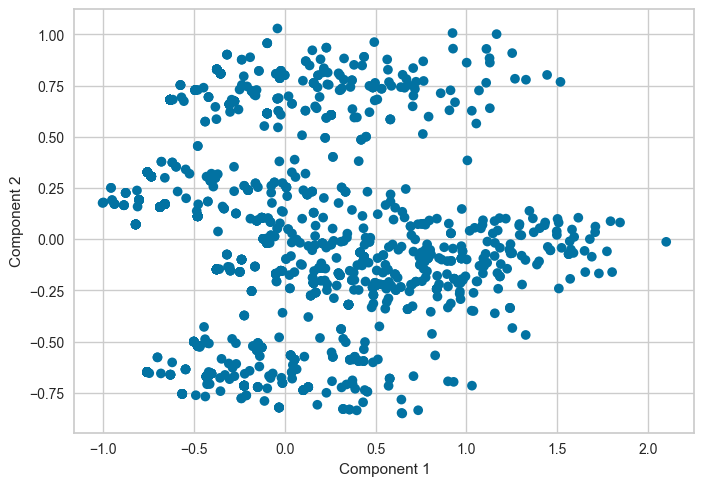

In [58]:
# Let's use PCA to visualize with only two components
pca2 = PCA(n_components = 2)
pca2.fit(X)
X_pca2 = pca2.transform(X)
print(X_pca2.shape)

# Scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], edgecolor='none', cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
# plt.colorbar();

In [59]:
# Fit the PCA algorithm to data 
pca = PCA().fit(X)

# Show the variance per component
pcaevr = ['{:f}'.format(item) for item in pca.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(X.columns)+1),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pca.explained_variance_ratio_)})
pcaDF

,Component,Variance explained,Cumulative variance explained
0,1,0.175138,0.175138
1,2,0.112225,0.287363
2,3,0.106900,0.394263
3,4,0.086514,0.480777
4,5,0.080550,0.561328
5,6,0.076215,0.637543
6,7,0.071772,0.709315
7,8,0.063795,0.773110
8,9,0.054397,0.827507
9,10,0.041334,0.868841


Text(0.5, 1.0, 'Explained variance by components')

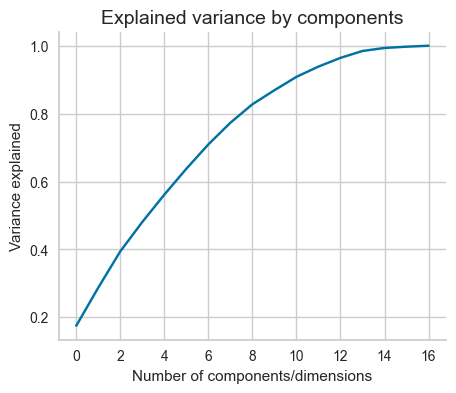

In [60]:
# Plot the cumulative explained variance

fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Decoration
sns.despine()
plt.xlabel('Number of components/dimensions')
plt.ylabel('Variance explained')
plt.rc('axes', labelsize=10)
plt.title('Explained variance by components', fontsize=14)

In [61]:
# Apply the dimension reduction to the dataset (for 15 components)
pca_reduced = PCA(n_components = 15)
pca_reduced.fit(X)
ds_pca_reduced = pca_reduced.transform(X) 
print(ds_pca_reduced.shape)

(1430, 15)


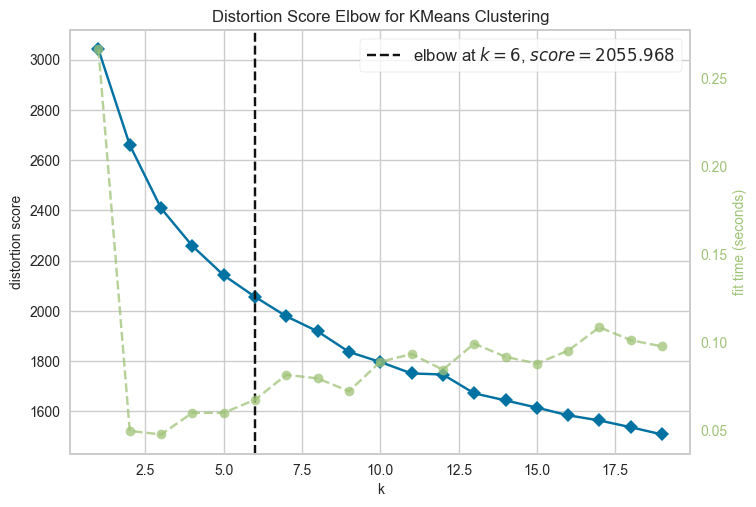

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:

# Apply the Elbow method to select K
km = KMeans()
visualizer = KElbowVisualizer(km, k=(1,20), random_state=123)
visualizer.fit(ds_pca_reduced)
visualizer.show() 

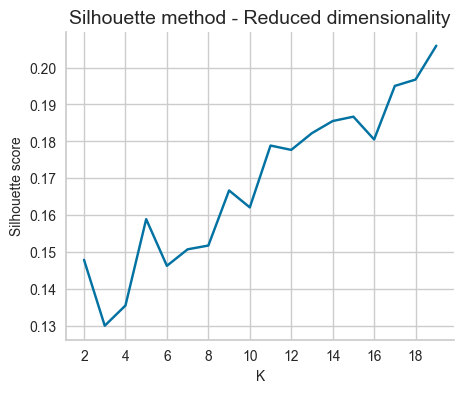

In [63]:
# Select K based on the Silhouette method
# ATTENTION! Depending on the computer this can take long time to run (more than 10 minutes)
sil = []

# Dissimilarity can only be measured in more than 1 partition, therefore it starts on K=2
for k in range(2, 20):
    km = KMeans(n_clusters = k, random_state=123).fit(X)
    labels = km.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))


# Show Results
# Draw
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(range(2, 20), sil, 'bx-')
# Decoration
sns.despine()
fmt = "{x:,.2f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.rc('axes', labelsize=10)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title('Silhouette method - Reduced dimensionality', fontsize=14);

In [64]:
# Apply the K-Means for K=8
K=8
kmeans = KMeans(n_clusters=K, random_state=123)
allDistances = kmeans.fit_transform(ds_pca_reduced)
y_kmeans = kmeans.predict(ds_pca_reduced)

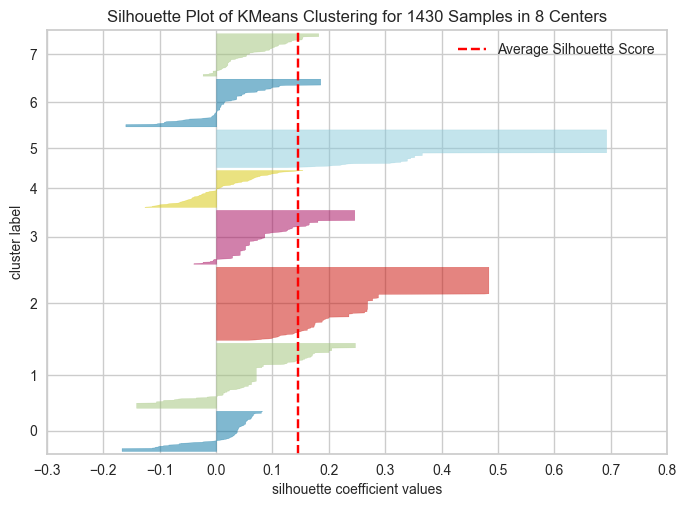

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1430 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [65]:
# Visualize Silhouette 
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(ds_pca_reduced)
visualizer.show()

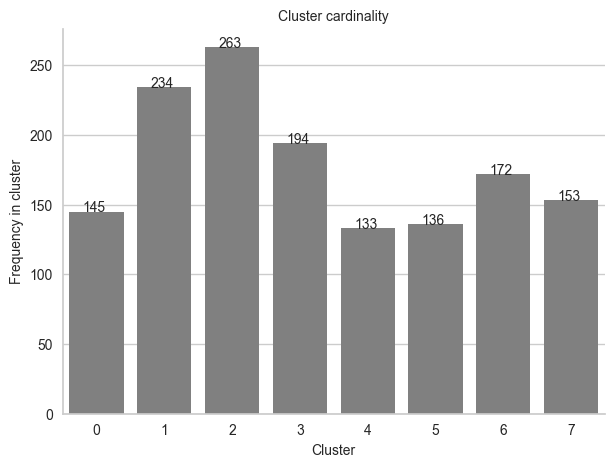

In [66]:
# Plot clusters cardinality 

# Count observations per cluster
freqByCluster = X.groupby(y_kmeans).size()

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.countplot(x=y_kmeans, color='grey')

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index,data in enumerate(freqByCluster):
    plt.text(x=index-0.2 , y=data , s=f"{data}" , fontdict=dict(fontsize=10))
sns.despine()
plt.title("Cluster cardinality", fontsize=10)
plt.xlabel("Cluster")
plt.ylabel("Frequency in cluster")
plt.rc('axes', labelsize=14)

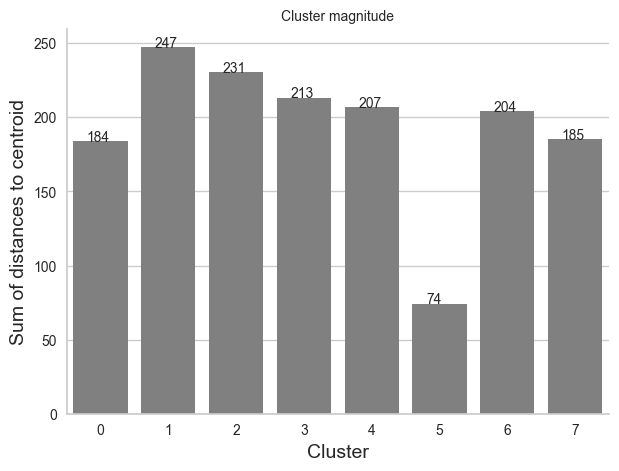

In [67]:
# Plot clusters magnitude

# Compute Magnitude
X['distanceToCentroid'] = np.min(allDistances,axis=1)
magnitude = X['distanceToCentroid'].groupby(y_kmeans).sum()
X = X.drop(columns=['distanceToCentroid'])

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.barplot(x=magnitude.index, y=magnitude.values, color='grey')

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index,data in enumerate(magnitude):
    plt.text(x=index-0.2 , y=data , s=f"{data:,.0f}" , fontdict=dict(fontsize=10))
sns.despine()
plt.title("Cluster magnitude", fontsize=10)
plt.xlabel("Cluster")
plt.ylabel("Sum of distances to centroid")
plt.rc('axes', labelsize=14)

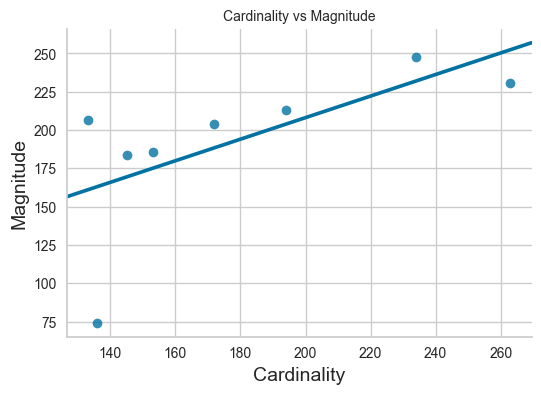

In [68]:
# Plot cardinality vs magnitude

# Draw
fig, ax = plt.subplots(figsize=(6,4))
g = sns.regplot(x=freqByCluster, y=magnitude, scatter=True, seed=123,truncate=False, ci=None)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Cardinality vs Magnitude", fontsize=10)
plt.xlabel("Cardinality")
plt.ylabel("Magnitude")
plt.rc('axes', labelsize=14)

In [69]:
# Create a dataframe with the weights per component
wheightsDF = pd.DataFrame(pca.components_,columns=X.columns)
wheightsDF

,Activities Work,Activities Hobbies,Activities Social Events,Activities Vacation,Activities Entertainment,Activities Club Membership,Activities Community,Activities Sports,Interests Family,Interests Home,Interests Job,Interests Community,Interests Recreation,Interests Fashion,Interests Food,Interests Media,Interests Pets
0,0.061962,0.010840,0.056193,0.210950,0.325858,0.014190,0.137159,0.192408,0.382551,0.256611,0.009749,0.074993,0.533692,0.255963,0.352951,0.127475,0.277643
1,0.011979,-0.005327,0.071969,0.013349,-0.021765,0.000793,0.047366,-0.106553,0.502087,0.148619,-0.001647,-0.006268,-0.066569,-0.827779,-0.007321,-0.012929,0.127702
2,-0.004696,-0.000356,-0.053314,0.094243,0.133811,-0.001469,-0.057938,-0.035871,-0.688167,-0.004522,-0.003344,0.039088,0.522042,-0.447914,0.041763,0.028827,0.121816
3,0.000976,0.005894,0.016538,0.124689,0.265067,0.011679,0.084755,0.014920,-0.269006,0.204347,0.008530,0.012303,-0.577696,0.021304,0.115161,-0.014044,0.666595
4,0.061114,0.008420,0.001224,-0.071178,0.697255,0.000315,-0.029005,0.029072,0.089871,-0.049693,-0.001681,0.026082,0.032826,0.015430,-0.697806,0.004408,-0.061464
5,0.029108,0.001187,0.026926,-0.073698,-0.263937,0.002000,0.008200,0.092247,-0.119590,0.883991,-0.013658,-0.008440,0.050095,0.065727,-0.315496,-0.023710,-0.108727
6,0.020214,-0.003552,-0.032536,-0.073065,0.470599,0.003828,-0.002394,0.041525,-0.115591,0.240900,0.004275,0.029902,-0.268817,-0.125761,0.488593,0.052800,-0.606694
7,-0.026081,0.014141,0.005926,0.055231,-0.102678,0.010769,0.091862,0.950703,-0.043060,-0.142292,-0.000504,0.041267,-0.098305,-0.164724,-0.072400,0.073382,-0.043272
8,0.009150,0.016926,0.064657,0.920993,-0.067431,0.002516,0.103425,-0.121504,-0.022212,-0.009737,-0.013762,0.046644,-0.113507,0.000442,-0.153797,0.153132,-0.232954
9,-0.016436,0.014974,-0.000038,-0.144632,-0.018295,0.005772,0.972915,-0.103209,-0.088362,-0.055879,0.000043,-0.035467,0.030792,-0.009092,-0.050973,-0.017945,-0.069744


In [70]:
comp = abs(wheightsDF.iloc[10])
comp = comp.sort_values(ascending=False)
comp

Interests Media               0.934358
Interests Community           0.258884
Activities Vacation           0.190506
Activities Sports             0.092266
Activities Entertainment      0.075870
Interests Recreation          0.061414
Interests Food                0.052585
Interests Pets                0.037760
Activities Social Events      0.016905
Interests Family              0.016752
Interests Job                 0.015546
Activities Community          0.013471
Interests Home                0.012463
Activities Club Membership    0.011190
Interests Fashion             0.009293
Activities Work               0.008287
Activities Hobbies            0.001870
Name: 10, dtype: float64

In [71]:
# Check the mean values of each cluster relevant top features
top_features = comp.index
clustersMeanDF = pd.DataFrame(X[top_features].groupby(y_kmeans).mean(),columns=top_features)
clustersMeanDF.transpose()

,0,1,2,3,4,5,6,7
Interests Media,0.103448,0.089744,0.076046,0.072165,0.248120,0.036765,0.052326,0.150327
Interests Community,0.055172,0.059829,0.060837,0.061856,0.203008,0.014706,0.023256,0.052288
Activities Vacation,0.096552,0.098291,0.083650,0.144330,0.503759,0.051471,0.145349,0.202614
Activities Sports,0.206897,0.188034,0.121673,0.139175,0.413534,0.058824,0.133721,0.222222
Activities Entertainment,0.220690,0.226496,0.178707,0.247423,0.736842,0.102941,0.186047,0.248366
Interests Recreation,0.448276,0.542735,0.277567,0.458763,0.849624,0.000000,0.290698,0.784314
Interests Food,0.179310,0.000000,0.102662,0.206186,0.624060,0.088235,0.145349,1.000000
Interests Pets,0.165517,0.038462,0.000000,0.000000,0.932331,0.000000,1.000000,0.137255
Activities Social Events,0.137931,0.081197,0.022814,0.036082,0.180451,0.080882,0.058140,0.045752
Interests Family,1.000000,1.000000,0.000000,0.000000,0.932331,1.000000,0.331395,0.810458


In [73]:
clustersMeanDF.to_excel("clustersMeanDF.xlsx", index=False)

In [72]:
labels = kmeans.labels_

# Group rows by their cluster IDs
clusters = {}
for i, label in enumerate(labels):
    if str(label) not in clusters:
        clusters[str(label)] = []
    clusters[str(label)].append(ds4.iloc[i]["Userprofile_url"])

print(clusters)

{'4': ['https://www.amazon.com/gp/profile/amzn1.account.AGNHDR3ZK4AVQJYFFZVLNNPI6TDQ/ref=cm_cr_arp_d_gw_btm?ie=UTF8', 'https://www.amazon.com/gp/profile/amzn1.account.AFFWEPJYSOGCZ7OZNZMVLJNXDL7Q/ref=cm_cr_arp_d_gw_btm?ie=UTF8', 'https://www.amazon.com/gp/profile/amzn1.account.AFFWEPJYSOGCZ7OZNZMVLJNXDL7Q/ref=cm_cr_arp_d_gw_btm?ie=UTF8', 'https://www.amazon.com/gp/profile/amzn1.account.AF23C6LY5QSXP4ZMUSR2CUIAYR4Q/ref=cm_cr_arp_d_gw_btm?ie=UTF8', 'https://www.amazon.com/gp/profile/amzn1.account.AFWLWJARS5EHNPGWB6SSS7H3NCJA/ref=cm_cr_arp_d_gw_btm?ie=UTF8', 'https://www.amazon.com/gp/profile/amzn1.account.AHUAXP7DAPXVFXA26SBAJBI435LA/ref=cm_cr_arp_d_gw_btm?ie=UTF8', 'https://www.amazon.com/gp/profile/amzn1.account.AGKRIR6YVXDMFID4L5QOG4YBX7XA/ref=cm_cr_arp_d_gw_btm?ie=UTF8', 'https://www.amazon.com/gp/profile/amzn1.account.AEYAYWBB4A7UU23BFXK7XNED3K7A/ref=cm_cr_arp_d_gw_btm?ie=UTF8', 'https://www.amazon.com/gp/profile/amzn1.account.AGBJLCHM3QH7WLAX74EKRF4QNLAA/ref=cm_cr_arp_d_gw_btm?ie=U

In [73]:
import json

with open("cluster.json", "w") as json_file:
    json.dump(clusters, json_file)